In [1]:
# Importing libraries

# For Data Analysis and Manipulation
import pandas as pd
import math
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For analysing time
import time
# For Data Scaling and Encoding
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# For Preprocessing and modelling
from tensorflow.keras.layers import Input
from sklearn.preprocessing import FunctionTransformer
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, Dense, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [2]:
# Loading data into DataFrames
trainingData = pd.read_csv("UNSW_NB15_training-set.csv")
testingData  = pd.read_csv("UNSW_NB15_testing-set.csv")

In [3]:
# Looking for total rows and columns in both data files
print("Train shape:", trainingData.shape)
print("Test  shape:", testingData.shape)

Train shape: (175341, 45)
Test  shape: (82332, 45)


In [4]:
# Printing the first few lines of Training data
trainingData.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
# Printing the first few lines of Testing data
testingData.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
# Printing the information for the Training data
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [7]:
# Printing the information for the Testing data
testingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
# Descriptive statistics on Training Data
trainingData.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
# Descriptive statistics on Testing Data
testingData.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [10]:
# Checking for missing values in Training data
trainingData.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [11]:
# Checking for missing values in Testing data
testingData.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [12]:
# Verifying duplicates in the Training data
trainingData.duplicated().sum()

np.int64(0)

In [13]:
# Verifying duplicates in the Testing data
testingData.duplicated().sum()

np.int64(0)

In [14]:
# Removing duplicates from Training data and testing data
trainingData.drop_duplicates(inplace=True)
testingData.drop_duplicates(inplace=True)

In [15]:
# Printing the Value counts of 'label' in training data
trainingData['attack_cat'].value_counts()

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [16]:
# Printing the Value counts of 'label' in testing data
testingData['attack_cat'].value_counts()

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

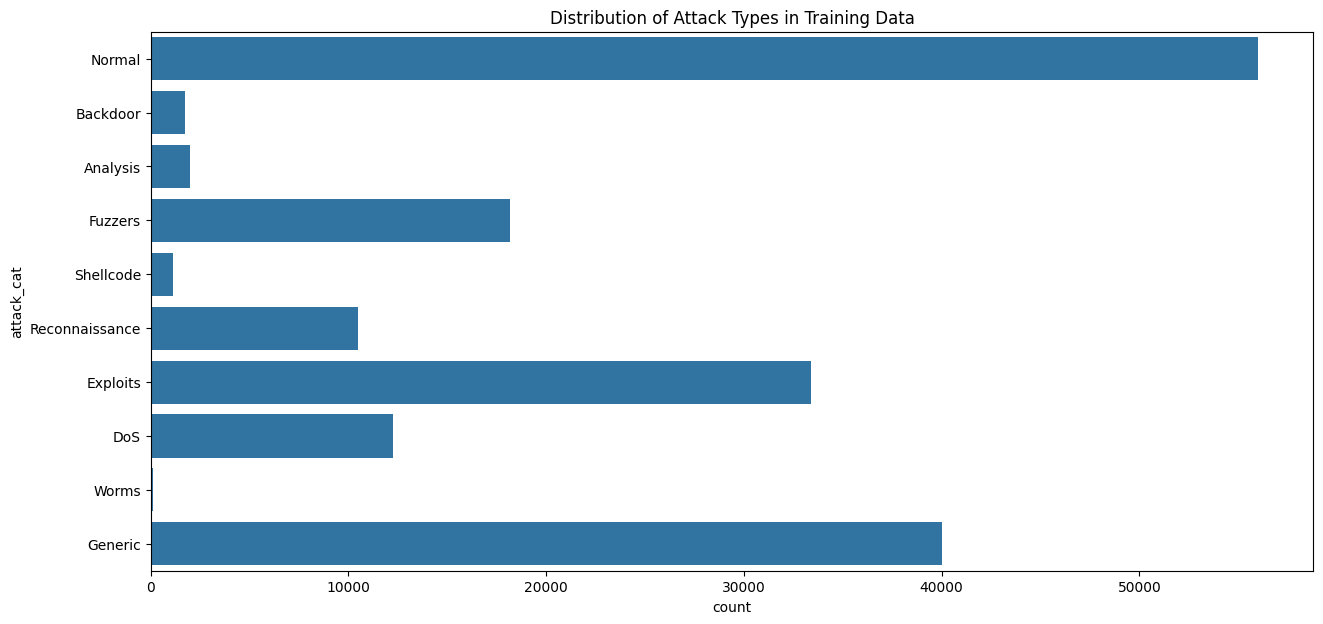

In [17]:
# Visualizing the distribution of attack types in training data
plt.figure(figsize=(15, 7))
sns.countplot(data=trainingData, y='attack_cat')
plt.title('Distribution of Attack Types in Training Data')
plt.show()

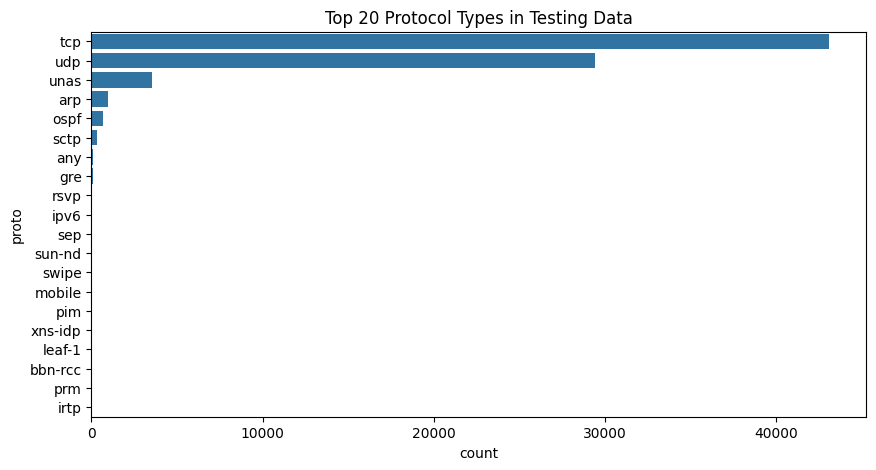

In [18]:
# Exploring the top 20 distribution of 'protocol_type' in testing data
TopProtocolTypeinTestingData = testingData['proto'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.countplot(data=testingData.reset_index(), y='proto', order=TopProtocolTypeinTestingData.index)
plt.title('Top 20 Protocol Types in Testing Data')
plt.show()

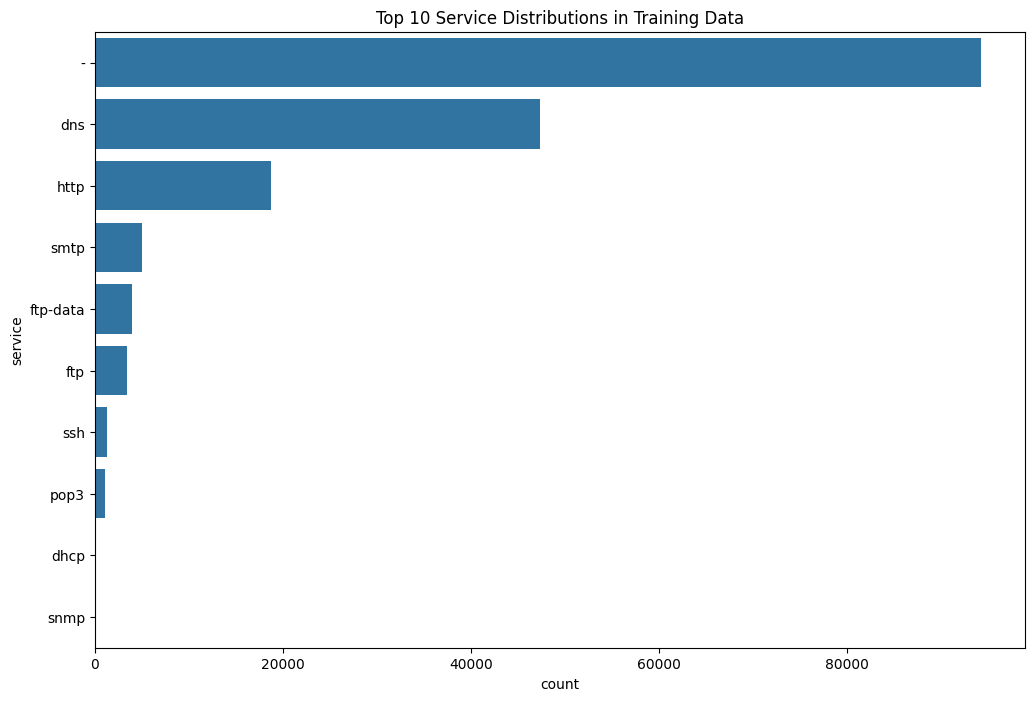

In [19]:
# Exploring the distribution of 'service' in training data by top 5 services
plt.figure(figsize=(12, 8))
sns.countplot(data=trainingData.reset_index(), y='service', order=trainingData['service'].value_counts().iloc[:10].index)
plt.title('Top 10 Service Distributions in Training Data')
plt.show()

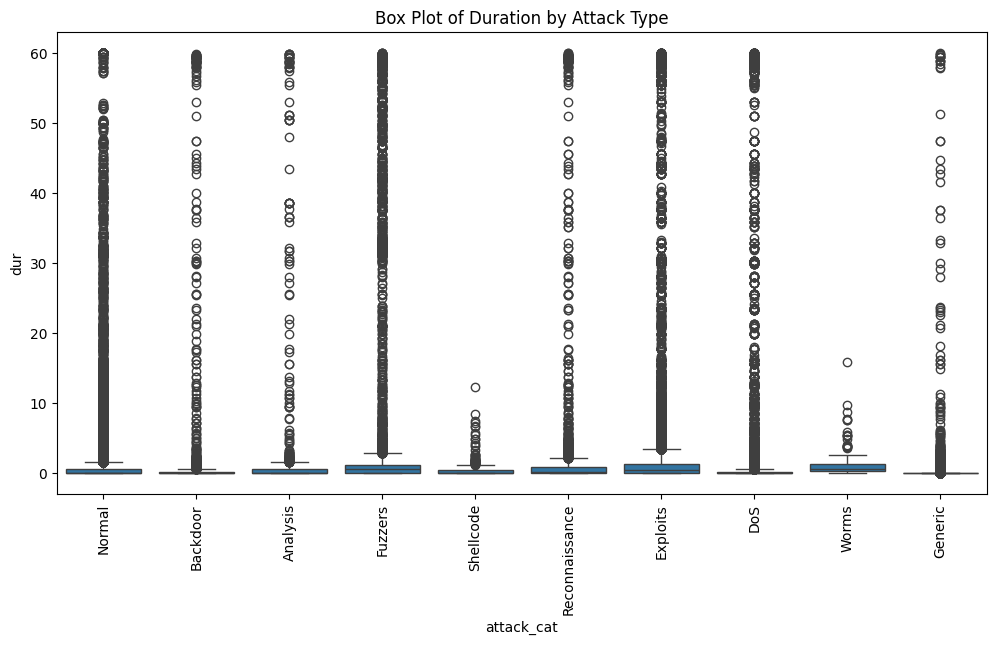

In [20]:
# Plotting Box Plot of Duration by Attack Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='attack_cat', y='dur', data=trainingData)
plt.xticks(rotation=90)
plt.title('Box Plot of Duration by Attack Type')
plt.show()

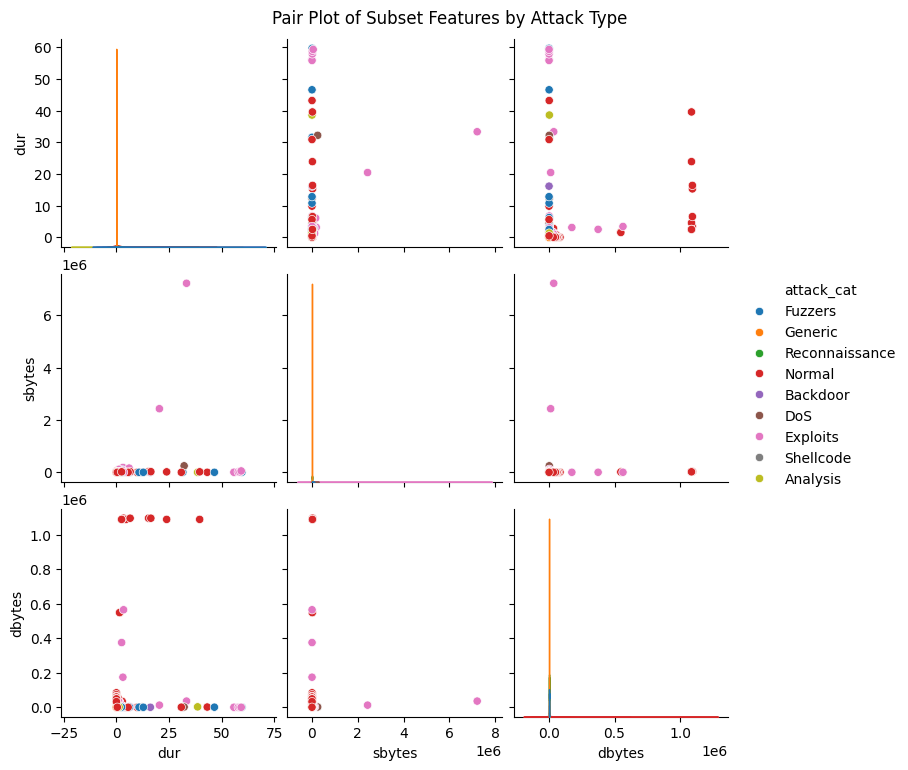

In [21]:
# Plotting a Pair plot of a subset of numerical features
PairPlotFeatures = ['dur', 'sbytes', 'dbytes', 'attack_cat']
sns.pairplot(trainingData[PairPlotFeatures].sample(frac=0.005), hue='attack_cat') # Using small sample
plt.suptitle('Pair Plot of Subset Features by Attack Type', y=1.02)
plt.show()

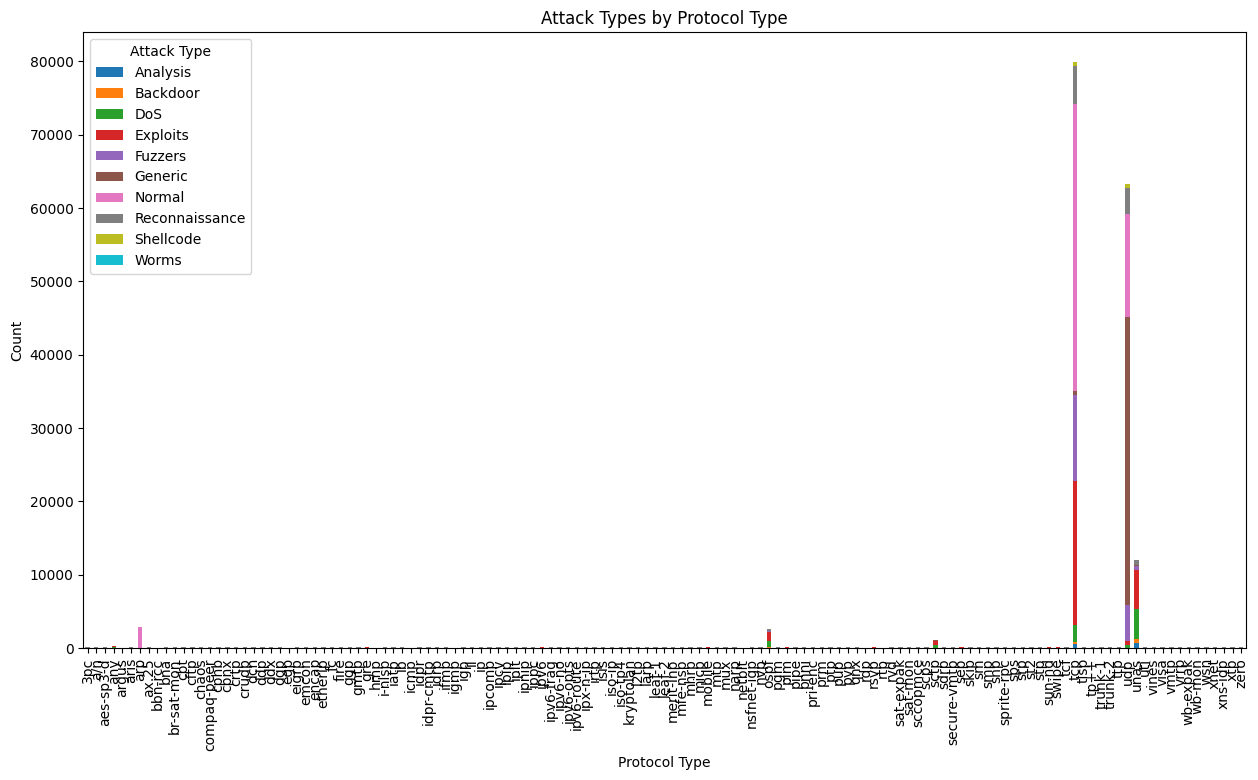

In [22]:
# Plotting Stacked bar plot for protocol_type and label
TotalProtocols = trainingData.groupby(['proto', 'attack_cat']).size().unstack(fill_value=0)
TotalProtocols.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Attack Types by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Attack Type')
plt.show()

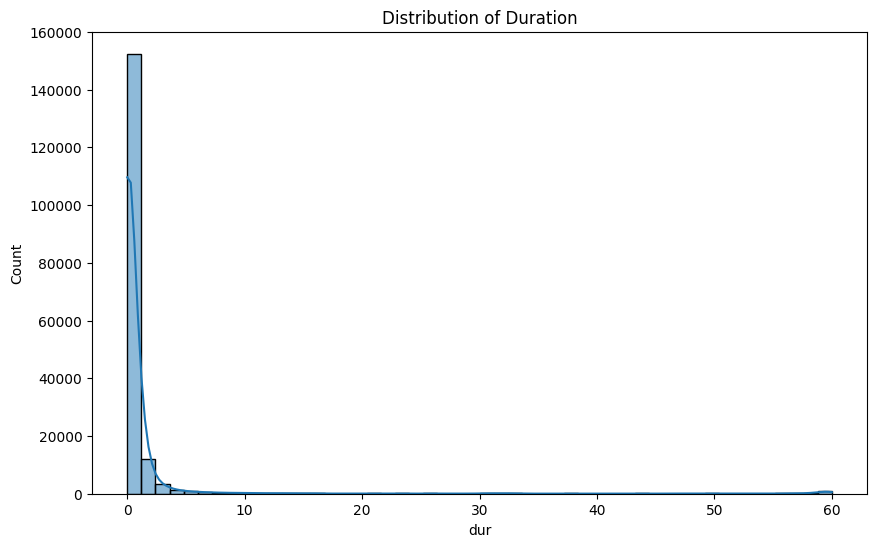

In [23]:
# Plotting a histogram with KDE for Distribution of Duration
plt.figure(figsize=(10, 6))
sns.histplot(data=trainingData, x='dur', kde=True, bins=50)
plt.title('Distribution of Duration')
plt.show()

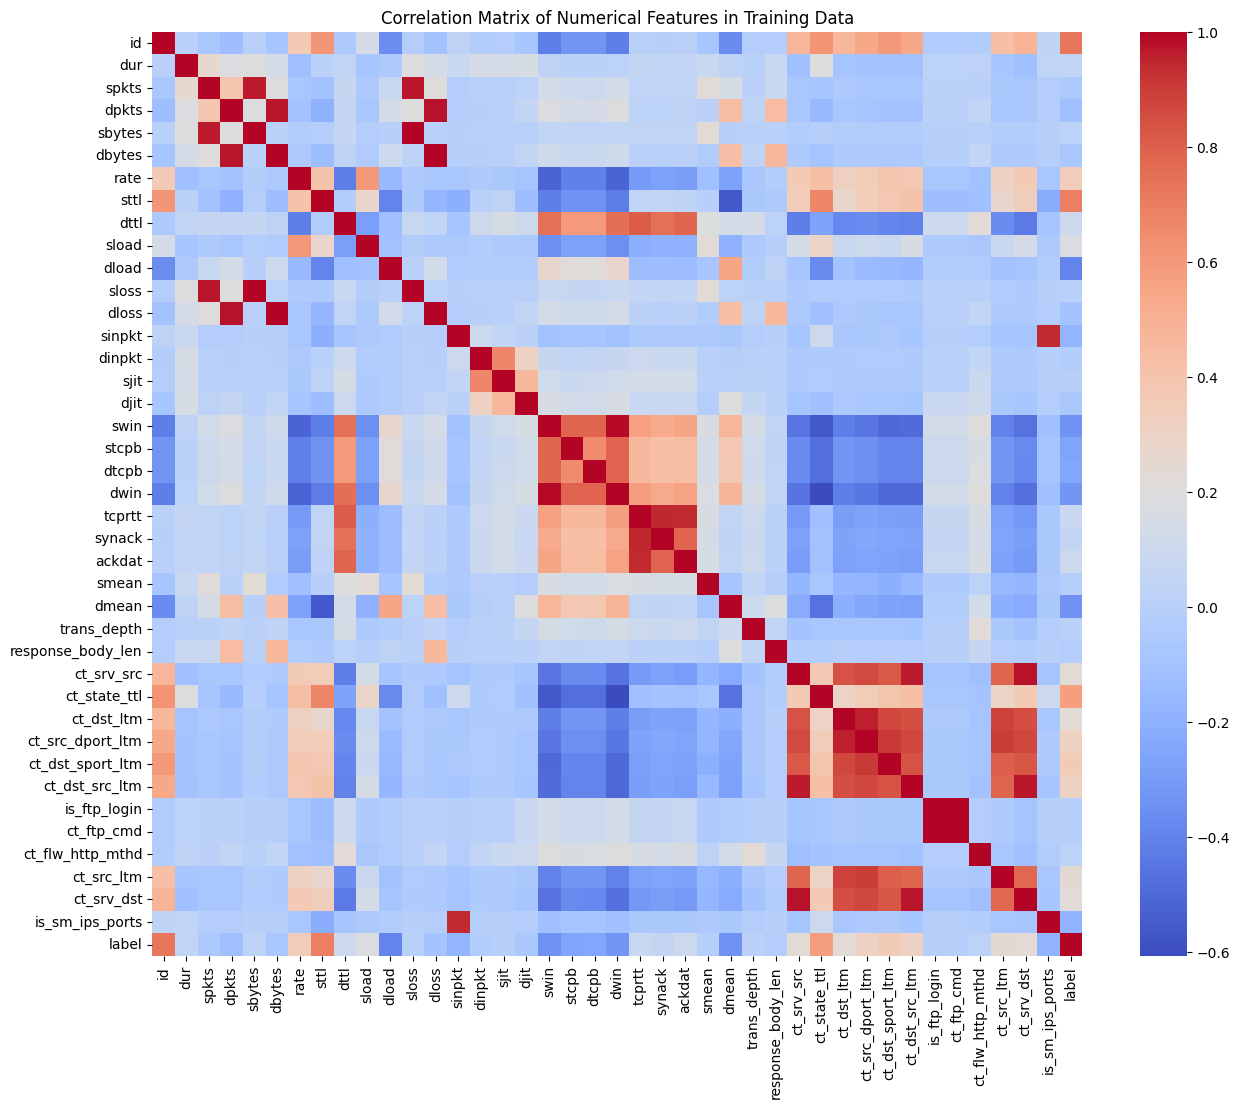

In [24]:
# Plotting the Correlation matrix of numerical features in training data
plt.figure(figsize=(15, 12))
sns.heatmap(trainingData.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features in Training Data')
plt.show()

In [25]:
# Identify object columns excluding the 'label' column
obj_cols = trainingData.drop('label', axis=1).select_dtypes(include='object').columns

In [26]:
# Defining a Function to measure latency per sample
def measure_latency_per_sample(model, X_test):
    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    total_time = end_time - start_time
    latency_per_sample = total_time / X_test.shape[0]
    return latency_per_sample

In [27]:
# Applying LabelEncoder on both training and testing dataset
for col in obj_cols:
    le = LabelEncoder()
    combined = pd.concat([trainingData[col], testingData[col]], axis=0)
    le.fit(combined)
    trainingData[col] = le.transform(trainingData[col])
    testingData[col] = le.transform(testingData[col])

In [28]:
# Scaling the data
scaler = StandardScaler()

X_train = trainingData.drop('label', axis=1)
y_train = trainingData['label']
X_test = testingData.drop('label', axis=1)
y_test = testingData['label']

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#y_train = y_train.apply(lambda x: 0 if x == "normal" else 1)
#y_test = y_test.apply(lambda x: 0 if x == "normal" else 1)


In [29]:
# Reshaping for 1D convolutional layers
X_train_seq = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_seq  = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [30]:
# Encoding the data for CNN
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [31]:
# Building the CNN + Bi-LSTM model
model = Sequential()
model.add(Conv1D(filters=48, kernel_size=3, activation='relu', input_shape=(X_train_seq.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

C:\Users\hitar\Music\Vandit Project\ids\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compiling the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
history = model.fit(X_train_seq, y_train_cat,
                    epochs=10,
                    batch_size=256,
                    validation_data=(X_test_seq, y_test_cat),
                   callbacks=early_stop)

Epoch 1/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9295 - loss: 0.1606 - val_accuracy: 0.7657 - val_loss: 0.9783
Epoch 2/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9924 - loss: 0.0219 - val_accuracy: 0.8482 - val_loss: 0.4923
Epoch 3/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9124 - val_loss: 0.2278
Epoch 4/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.8576 - val_loss: 1.3319
Epoch 5/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9521 - val_loss: 0.1502
Epoch 6/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9998 - loss: 8.1084e-04 - val_accuracy: 0.9522 - val_loss: 0.1626
Epoch 7/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9998 - loss: 6.5034e-04 - val_accuracy: 0.9792 - val_loss: 0.0877
Epoch 8/10
685/685 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9999 - loss: 5

In [33]:
# Calculating the metrics for CNN-BiLSTM
y_pred_cnn = np.argmax(model.predict(X_test_seq, batch_size=64), axis=-1)
y_test_cnn = np.argmax(y_test_cat, axis=-1)
accuracy_cnn = accuracy_score(y_test_cnn, y_pred_cnn)
precision_cnn = precision_score(y_test_cnn, y_pred_cnn, average='weighted' )
recall_cnn = recall_score(y_test_cnn, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test_cnn, y_pred_cnn, average='weighted')
print(f"CNN-BiLSTM Model Evaluation:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1-score: {f1_cnn:.4f}")

1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
CNN-BiLSTM Model Evaluation:
Accuracy: 0.9864
Precision: 0.9868
Recall: 0.9864
F1-score: 0.9864


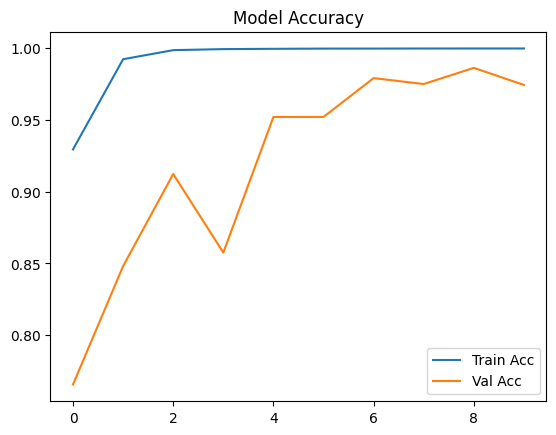

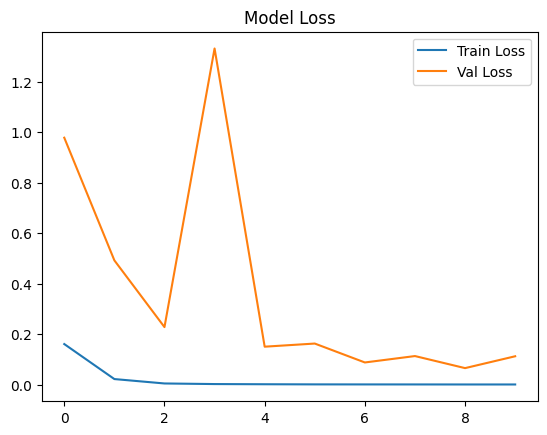

In [34]:
# Evaluating the performance of the model

# Plotting Accuracy and loss plots
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.legend()
plt.show()

## Model training Random Forest model.


In [35]:
# Defining and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=32)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# Making predictions on the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

## Evaluate random forest model


In [37]:
# Evaluating the random forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

Random Forest Model Evaluation:
Accuracy: 0.7553
Precision: 0.8306
Recall: 0.7553
F1-score: 0.7318


## Define and train xgboost model

In [38]:
# Creating an XGBClassifier instance
xgb_model = XGBClassifier(max_depth=1, n_estimators=10, eval_metric='mlogloss', random_state=96)

In [39]:
# Fitting the xgb_model to the training data
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [40]:
# Making predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test_scaled)

## Evaluate xgboost model

In [41]:
# Evaluating XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

In [42]:
print(f"XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")

XGBoost Model Evaluation:
Accuracy: 0.9689
Precision: 0.9709
Recall: 0.9689
F1-score: 0.9690


In [43]:
# Measure latency per prediction for each model
latency_cnn = measure_latency_per_sample(model, X_test_seq)*1000
latency_rf = measure_latency_per_sample(rf_model, X_test_scaled)*1000
latency_xgb = measure_latency_per_sample(xgb_model, X_test_scaled)*1000

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [44]:
# Printing latency per prediction for each model
print(f"CNN-BiLSTM Latency per prediction: {latency_cnn:.4f} ms")
print(f"Random Forest Latency per prediction: {latency_rf:.4f} ms")
print(f"XGBoost Latency per prediction: {latency_xgb:.4f} ms")

CNN-BiLSTM Latency per prediction: 0.1261 ms
Random Forest Latency per prediction: 0.0002 ms
XGBoost Latency per prediction: 0.0001 ms


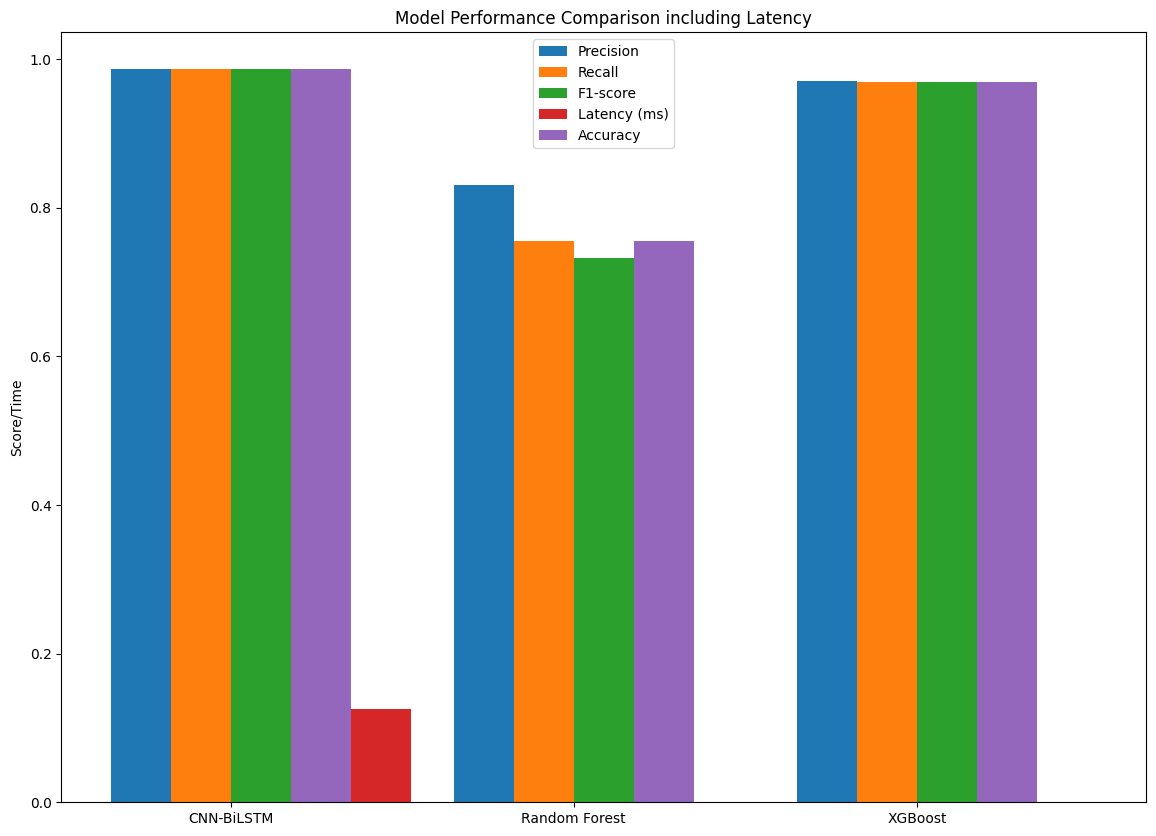

In [45]:
# Comparing models performance including latency
models = ['CNN-BiLSTM', 'Random Forest', 'XGBoost']
precisions = [precision_cnn, precision_rf, precision_xgb]
recalls = [recall_cnn, recall_rf, recall_xgb]
f1_scores = [f1_cnn, f1_rf, f1_xgb]
latencies = [latency_cnn, latency_rf, latency_xgb]
accuracy = [accuracy_cnn, accuracy_rf, accuracy_xgb]

x = np.arange(len(models))
width = 0.175

fig, ax = plt.subplots(figsize=(14, 10))
rects1 = ax.bar(x - width, precisions, width, label='Precision')
rects2 = ax.bar(x, recalls, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-score')
rects4 = ax.bar(x + 3 * width, latencies, width, label='Latency (ms)')
rects5 = ax.bar(x + 2 * width, accuracy, width, label='Accuracy')

ax.set_ylabel('Score/Time')
ax.set_title('Model Performance Comparison including Latency')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [46]:
# Performing predictions using all models
predictions = {
    'CNN-BiLSTM': y_pred_cnn,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}
real_repeated = np.tile(y_test, len(predictions))
predicted = []
model_names_repeated = []
for model_name, model_predictions in predictions.items():
    predicted.extend(model_predictions)
    model_names_repeated.extend([model_name] * len(model_predictions))

In [47]:
# Creating a Comparison dataframe
df = pd.DataFrame({
    'Real': real_repeated,
    'Predicted': predicted,
    'Model': model_names_repeated})

In [48]:
# Adding a column to mark mispredictions
df['Correct'] = df['Real'] == df['Predicted']

In [49]:
# Showing only misclassified rows
misclassified_df = df[df['Correct'] == False]

In [50]:
# Displaying the top 10 misclassifications
display(df.head(10))

,Real,Predicted,Model,Correct
0,0,0,CNN-BiLSTM,True
1,0,0,CNN-BiLSTM,True
2,0,0,CNN-BiLSTM,True
3,0,0,CNN-BiLSTM,True
4,0,0,CNN-BiLSTM,True
5,0,0,CNN-BiLSTM,True
6,0,0,CNN-BiLSTM,True
7,0,0,CNN-BiLSTM,True
8,0,0,CNN-BiLSTM,True
9,0,0,CNN-BiLSTM,True


Confusion Matrix for CNN-BiLSTM:


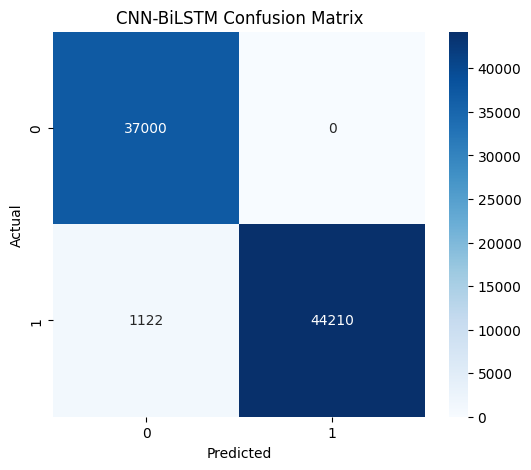

Confusion Matrix for Random Forest:


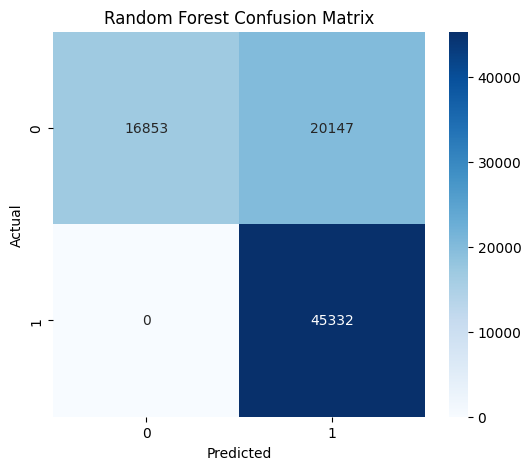

Confusion Matrix for XGBoost:


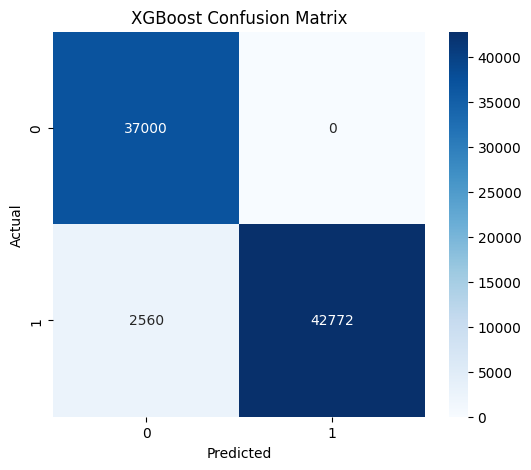

In [51]:
# Plotting all models confusion matrix
models_predictions = {
    'CNN-BiLSTM': y_pred_cnn,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb}

for model_name, y_pred in models_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")

    # Optional: Heatmap visualization
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()